In [22]:
# Wir vergleichen beide File (Twitter & Publikationen) und schauen welche Wörter am meisten vorkommen. 
# Dabei elimieren wir Verbindungswörter wir u. a. "und" usw.   
# Sonntag 20. März 2022


In [23]:
#Importieren der benötigten Bibliotheken.  
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Für testen auf GDrive
from google.colab import drive
drive.mount("/gd")

Drive already mounted at /gd; to attempt to forcibly remount, call drive.mount("/gd", force_remount=True).


Beide Files aus Aufgabe 1 und Aufgabe 2

In [25]:
publication_xlsx = 'SpinasJPBonus2-1.csv'
tweet_json = 'SpinasJPTweepy.json'

In [30]:
os.listdir(".")

['.config', 'sample_data']

In [31]:
tweet_df = pd.read_json(tweet_json)
tweet_df.head()

ValueError: ignored

In [27]:
publication_df = pd.read_csv(publication_xlsx, encoding='cp1252')
publication_df.head()

FileNotFoundError: ignored

In [ ]:
publication_word_count_df = publication_df.title.str.split(expand=True).stack().value_counts().rename_axis('words').reset_index(name='count')
publication_word_count_df.head()

NameError: ignored

In [ ]:
tweet_word_count_df = tweet_df.text.str.split(expand=True).stack().value_counts().rename_axis('words').reset_index(name='count')
tweet_word_count_df.head()

NameError: ignored

# Wörter eliminieren

Stopwords aus dem Englischen und Deutschen eliminieren + rt

In [ ]:
german_stop_words = stopwords.words('german')
english_stop_words = stopwords.words('english')
all_stop_words = german_stop_words + english_stop_words + ['rt']

In [ ]:
publication_word_count_df['words'] = publication_word_count_df['words'].str.lower()
tweet_word_count_df['words'] = tweet_word_count_df['words'].str.lower()

NameError: ignored

In [ ]:
publication_word_count_filtered_df = publication_word_count_df[~publication_word_count_df['words'].isin(all_stop_words)]
publication_word_count_filtered_df = publication_word_count_filtered_df[publication_word_count_df['words'].str.isalpha()]
publication_word_count_filtered_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,words,count
9,knowledge,43
12,management,32
17,unternehmen,23
19,enterprise,20
20,networks,18


In [ ]:
tweet_word_count_filtered_df = tweet_word_count_df[~tweet_word_count_df['words'].isin(all_stop_words)]
tweet_word_count_filtered_df = tweet_word_count_filtered_df[tweet_word_count_df['words'].str.isalpha()]
tweet_word_count_filtered_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,words,count
31,mobile,62
39,business,48
45,social,43
47,enterprise,41
54,kolumne,37


Die 30 meisterwähnten Wörter

In [ ]:


fig, ax = plt.subplots()
plt.title ('Häufigste Worte - Tweets vs. Publikationen', fontsize=16, color="black")
plt.xlabel("Wörter", fontsize=14)
plt.ylabel('Frequenz', fontsize=14)
plt.xticks(rotation = 90)
fig.set_size_inches(20, 10)

w = 0.3
ax.bar(tweet_word_count_filtered_df.iloc[:30]["words"], tweet_word_count_filtered_df.iloc[:30]["count"],width=w, color='b', align='edge')
ax.bar(publication_word_count_filtered_df.iloc[:30]["words"], publication_word_count_filtered_df.iloc[:30]["count"],width=-w, color='g', align='edge')
ax.autoscale(tight=True)


NameError: ignored

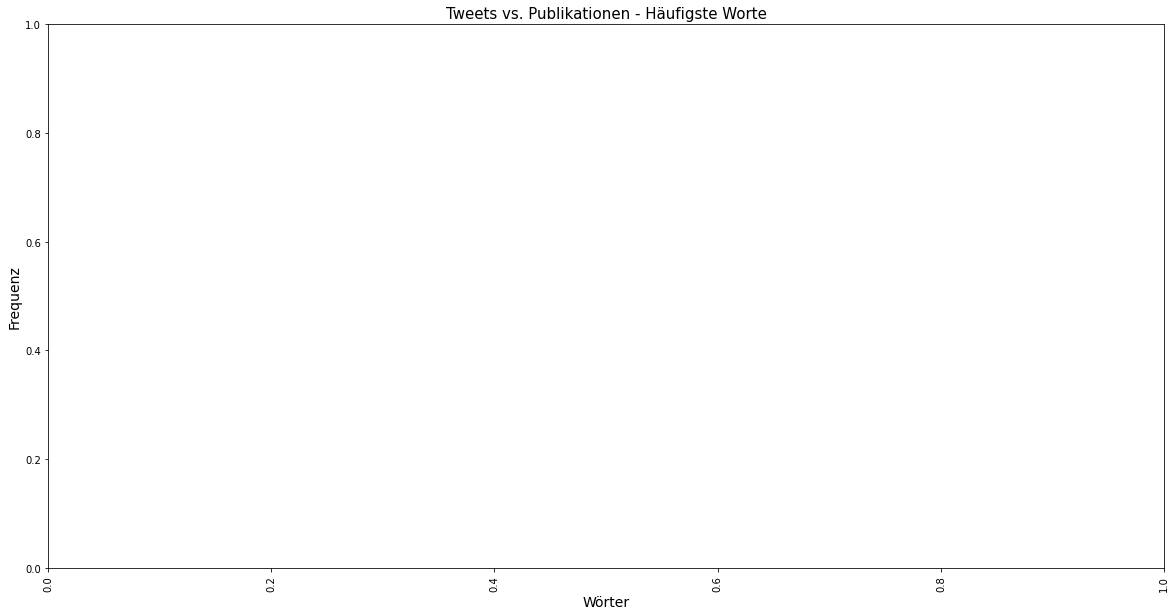

In [32]:
fig, ax = plt.subplots()
plt.title ('Tweets vs. Publikationen - Häufigste Worte', fontsize=15, color="black")
plt.xlabel("Wörter", fontsize=14)
plt.ylabel('Frequenz', fontsize=14)
plt.xticks(rotation = 90)
fig.set_size_inches(20, 10)

w = 0.3
ax.bar(publication_word_count_filtered_df.iloc[:30]["words"], publication_word_count_filtered_df.iloc[:30]["count"],width=-w, color='g', align='edge')
ax.bar(tweet_word_count_filtered_df.iloc[:30]["words"], tweet_word_count_filtered_df.iloc[:30]["count"],width=w, color='b', align='edge')
ax.autoscale(tight=True)